# Example: Water Management

Miranda and Fackler, <i>Applied Computational Economics and Finance</i>, 2002,
Section 7.6.5

In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import numpy as np
import itertools
import matplotlib.pyplot as plt
from quantecon.markov import DiscreteDP

In [3]:
M = 30
n = M + 1  # Number of states
m = n  # Number of actions

a1, b1 = 14, 0.8
a2, b2 = 10, 0.4
F = lambda s, x: a1 * x**b1
G = lambda s, x: a2 * (s - x)**b2

beta = 0.9

In [4]:
# Reward array
R = np.empty((n, m))
for s, x in itertools.product(range(n), range(m)):
    R[s, x] = F(s, x) + G(s, x) if x <= s else -np.inf

In [5]:
# Probability transition array
probs = np.array([0.1, 0.2, 0.4, 0.2, 0.1])
size_supp = len(probs)
Q = np.zeros((n, m, n))
for s, x in itertools.product(range(n), range(m)):
    if x <= s:
        for j in range(size_supp):
            Q[s, x, np.minimum(s-x+j, n-1)] += probs[j]

In [6]:
# Create a DiscreteDP
ddp = DiscreteDP(R, Q, beta)

In [7]:
# Solve the dynamic optimization problem (by policy iteration)
res = ddp.solve()

In [8]:
# Number of iterations
res.num_iter

4

In [9]:
# Optimal policy
res.sigma

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5])

In [10]:
# Optimal value function
res.v

array([ 338.41645251,  361.98791375,  377.4257383 ,  391.4257383 ,
        405.2360958 ,  417.9622843 ,  429.86115765,  441.17106277,
        452.06672421,  462.66012607,  473.03554185,  483.40234488,
        493.51237732,  503.35334776,  512.93797732,  522.31628408,
        531.65601391,  540.88902181,  549.98545145,  558.93954761,
        567.74582688,  576.47074514,  585.14046164,  593.69786291,
        602.15675175,  610.510884  ,  618.80539659,  627.0562497 ,
        635.2098027 ,  643.28164235,  651.27787278])

In [11]:
# Simulate the controlled Markov chain for num_rep times
# and compute the average
init = 0
ts_length = 50+1
num_rep = 10**4
ave_path = np.zeros(ts_length)
for i in range(num_rep):
    path = res.mc.simulate(ts_length=ts_length, init=init)
    ave_path = (i/(i+1)) * ave_path + (1/(i+1)) * path

In [12]:
ave_path

array([  0.    ,   2.0186,   3.7242,   4.8964,   5.9481,   6.931 ,
         7.827 ,   8.6082,   9.2431,   9.7545,  10.1598,  10.5033,
        10.7833,  11.0077,  11.1962,  11.3612,  11.5109,  11.6388,
        11.7362,  11.8301,  11.8986,  11.9682,  12.0206,  12.0719,
        12.1497,  12.2144,  12.2503,  12.2689,  12.2866,  12.3155,
        12.3397,  12.3851,  12.4065,  12.4222,  12.4389,  12.4539,
        12.4536,  12.4624,  12.4744,  12.4728,  12.4814,  12.477 ,
        12.4861,  12.4904,  12.4886,  12.4784,  12.4898,  12.4767,
        12.4718,  12.4864,  12.4848])

In [13]:
# Stationary distribution of the Markov chain
stationary_dist = res.mc.stationary_distributions[0]

In [14]:
stationary_dist

array([  0.00000000e+00,   0.00000000e+00,   1.15115026e-07,
         1.03603524e-06,   8.05805183e-06,   5.98598136e-05,
         4.44344001e-04,   3.29804550e-03,   2.44792103e-02,
         6.08112470e-02,   1.20881706e-01,   1.39769288e-01,
         1.50250205e-01,   1.50250201e-01,   1.39769301e-01,
         1.20881695e-01,   6.08112091e-02,   2.44793930e-02,
         3.29774206e-03,   4.43926815e-04,   5.70763048e-05,
         6.34181165e-06,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00])

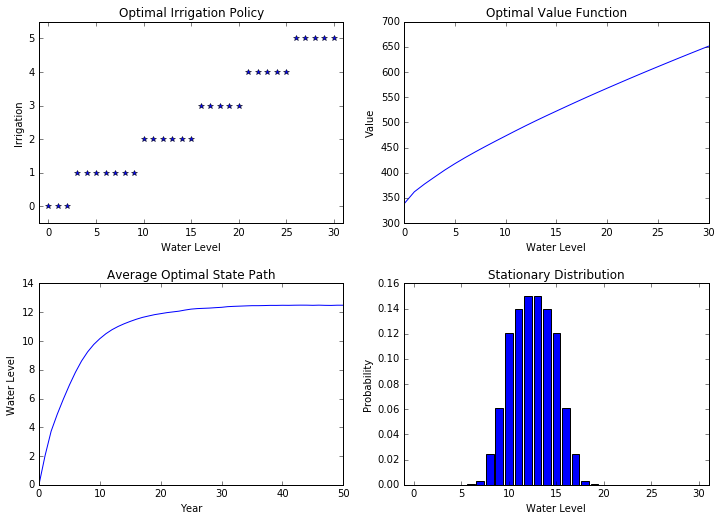

In [15]:
# Plot sigma, v, ave_path, stationary_dist
hspace = 0.3
fig, ax = plt.subplots(2, 2, figsize=(12, 8+hspace))
fig.subplots_adjust(hspace=hspace)

ax[0, 0].plot(res.sigma, '*')
ax[0, 0].set_xlim(-1, 31)
ax[0, 0].set_ylim(-0.5, 5.5)
ax[0, 0].set_xlabel('Water Level')
ax[0, 0].set_ylabel('Irrigation')
ax[0, 0].set_title('Optimal Irrigation Policy')

ax[0, 1].plot(res.v)
ax[0, 1].set_xlabel('Water Level')
ax[0, 1].set_ylabel('Value')
ax[0, 1].set_title('Optimal Value Function')

ax[1, 0].plot(ave_path)
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('Water Level')
ax[1, 0].set_title('Average Optimal State Path')

ax[1, 1].bar(range(n), stationary_dist, align='center')
ax[1, 1].set_xlim(-1, n)
ax[1, 1].set_xlabel('Water Level')
ax[1, 1].set_ylabel('Probability')
ax[1, 1].set_title('Stationary Distribution')

plt.show()